<a href="https://colab.research.google.com/github/leehom22/leehom22/blob/main/TF_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
!pip install tensorflow matplotlib keras numpy

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

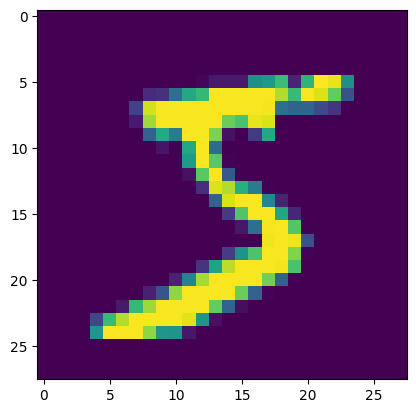

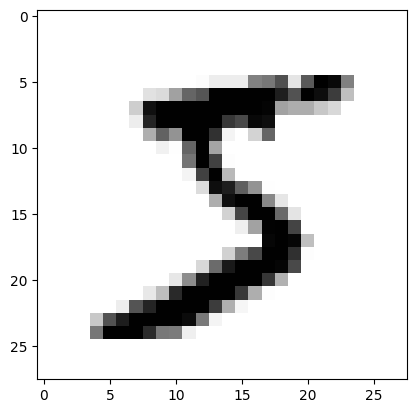

In [8]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()


In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [10]:
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train[0])
print(y_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
print(y_test[0])

7


In [12]:
import numpy as np
img_size=28
x_trainr=x_train.reshape(x_train.shape[0],img_size,img_size,1)
x_testr=x_test.reshape(x_test.shape[0],img_size,img_size,1)

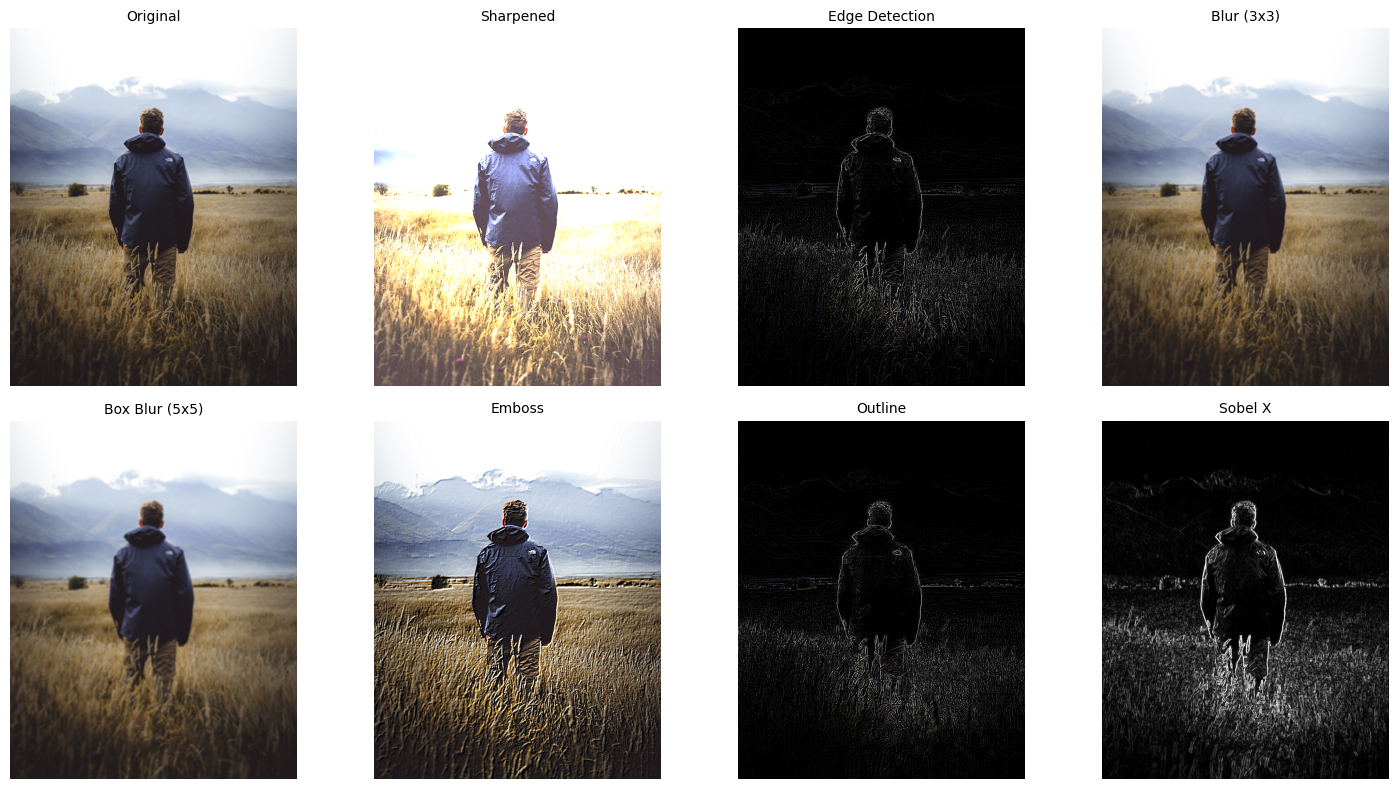

In [13]:
!pip install opencv-python --quiet
# Step 2: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from google.colab import files


# Step 3: Function to load image from URL
def load_image_from_url(url):
    try:
        resp = urlopen(url)
        image_array = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        if image is None:
            raise ValueError("Image could not be decoded.")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image
    except Exception as e:
        print(f"Failed to load image: {e}")
        return None


# Load image from URL
url = 'https://images.unsplash.com/photo-1503023345310-bd7c1de61c7d?w=640'
image = load_image_from_url(url)




# Step 4: Define filter kernels
sharpen_kernel = np.array([
    [0, -1, 0],
    [-1, 7, -1],
    [0, -1, 0]
])


edge_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])


blur_kernel = np.ones((3, 3), np.float32) / 9.0
box_blur_kernel = np.ones((5, 5), np.float32) / 25.0


emboss_kernel = np.array([
    [-2, -1, 0],
    [-1,  1, 1],
    [0,   1, 2]
])


outline_kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])


# Sobel X (grayscale only)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_x = cv2.convertScaleAbs(sobel_x)


# Step 5: Apply filters
filtered_images = [
    image,
    cv2.filter2D(image, -1, sharpen_kernel),
    cv2.filter2D(image, -1, edge_kernel),
    cv2.filter2D(image, -1, blur_kernel),
    cv2.filter2D(image, -1, box_blur_kernel),
    cv2.filter2D(image, -1, emboss_kernel),
    cv2.filter2D(image, -1, outline_kernel),
    sobel_x
]


titles = [
    'Original',
    'Sharpened',
    'Edge Detection',
    'Blur (3x3)',
    'Box Blur (5x5)',
    'Emboss',
    'Outline',
    'Sobel X'
]


# Step 6: Show results in 2x4 grid
plt.figure(figsize=(15, 8))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    img = filtered_images[i]
    if len(img.shape) == 2:  # Grayscale (Sobel X)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
    else:
        plt.imshow(img)
    plt.title(titles[i], fontsize=10)
    plt.axis('off')


plt.tight_layout()
plt.show()


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense Layers with Dropout
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.25)) # Dropout for regularization

model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.25))

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [18]:
model.fit(x_trainr,y_train,epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 69s 51ms/step - accuracy: 0.7207 - loss: 0.8321 - val_accuracy: 0.9631 - val_loss: 0.1306
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 47ms/step - accuracy: 0.9570 - loss: 0.1575 - val_accuracy: 0.9751 - val_loss: 0.0901
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9710 - loss: 0.1131 - val_accuracy: 0.9784 - val_loss: 0.0774
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 86s 50ms/step - accuracy: 0.9781 - loss: 0.0810 - val_accuracy: 0.9828 - val_loss: 0.0626
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.9806 - loss: 0.0739 - val_accuracy: 0.9843 - val_loss: 0.0594


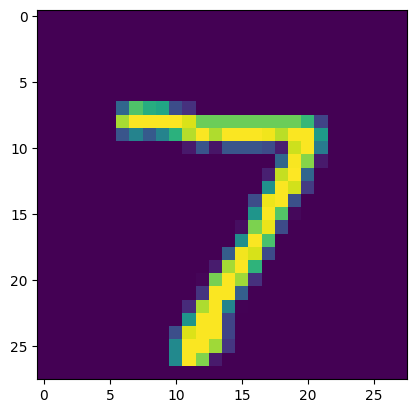

In [19]:
plt.imshow(x_test[0])
plt.show()

In [21]:
prediction =model.predict(x_testr)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


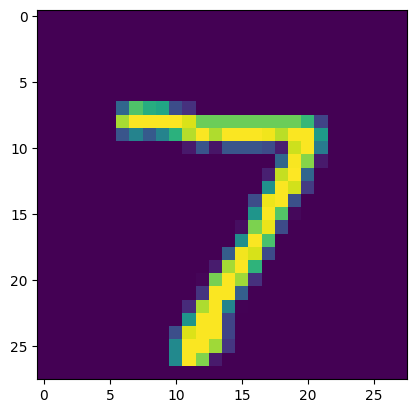

In [22]:
plt.imshow(x_test[0])
plt.show()

In [23]:
print(np.argmax(prediction[0]))

7


In [24]:
print(prediction[0])

[2.7569514e-11 2.6571147e-08 1.6865314e-06 4.3741392e-07 1.5576955e-09
 3.0827343e-13 6.9282577e-17 9.9999768e-01 7.8921168e-11 9.0441766e-08]


In [25]:
model.save("model.keras")

In [26]:
!pip install gradio tensorflow pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00


In [31]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps


model = load_model("model.keras")


# Define prediction function
def predict_digit(image):
    try:
        img = Image.fromarray(image).convert("L")
        img = img.resize((28, 28))
        img = ImageOps.invert(img)
        img_array = np.array(img) / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)
        prediction = model.predict(img_array)
        return f"Prediction: {np.argmax(prediction)}"
    except Exception as e:
        return f"Error: {e}"


# Gradio interface allows hand drawing on canvas
gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(label="Draw a digit here", image_mode='L', interactive=True, height=200, width=200),  # Specify height and width here
    outputs=gr.Textbox(label="Prediction")
).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://63477a328db099e0d4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
